In [133]:
import numpy as np
from sklearn.datasets import load_iris
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelBinarizer

In [134]:
iris = load_iris()

x = iris.data

y = iris.target
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y) + 1))
y = label_binarizer.transform(y)

In [135]:
functions = [
    tf.keras.activations.sigmoid,
    tf.keras.activations.tanh,
    tf.keras.activations.relu,
    tf.keras.layers.LeakyReLU(name="leaky_relu"),
    tf.keras.activations.selu,
    tf.keras.activations.elu,
]

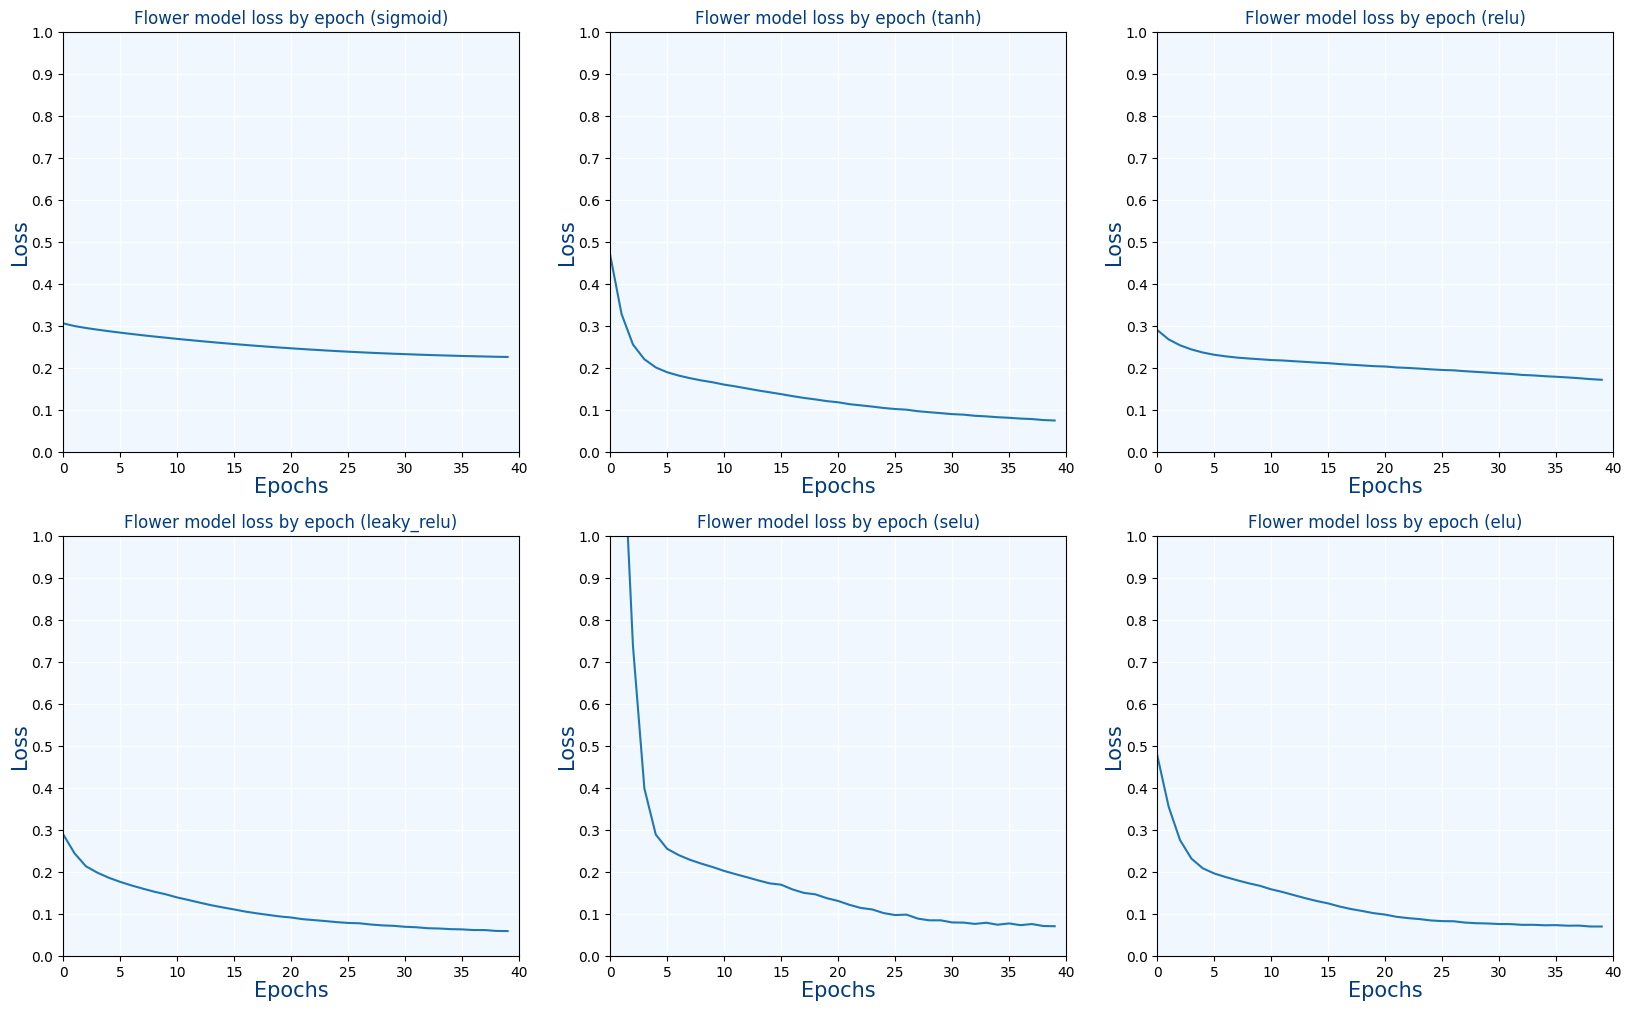

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [136]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, funct in enumerate(functions):
    tf.keras.utils.set_random_seed(2055)

    model = Sequential()
    model.add(Dense(6, activation=funct, input_dim=x.shape[1]))
    model.add(Dense(12, activation=funct))
    model.add(Dense(6, activation=funct))
    model.add(Dense(3, activation=funct))
    model.compile(loss='mean_squared_error')

    history = model.fit(x, y, epochs=40, verbose=False)

    figure = plt.figure()
    figure.set_facecolor("#CCCCCC")

    axes = axs[i]
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=1)
    axes.set_axisbelow(True)

    axes.set_xlabel("Epochs", fontsize=15, labelpad=1, color="#003B80")
    axes.set_ylabel("Loss", fontsize=15, labelpad=1, color="#003B80")
    function_name = funct.name if isinstance(funct, tf.keras.layers.LeakyReLU) else funct.__name__
    axes.set_title(f"Flower model loss by epoch ({function_name})", fontsize=15, pad=15, color="#003B80")

    axes.set_ylim([0, 1])
    axes.set_xlim([0, 40])

    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    loss = np.array(history.history['loss'])

    axes.plot(loss)
    axes.set_title(f"Flower model loss by epoch ({function_name})")

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()